#3주차 과제 공지사항

----

1. 아래의 과제를 보고 답안을 작성하시면 됩니다.
2. 과제에 대한 점수는 100점 만점으로 진행이 됩니다. (한 문제당 20점)
3. 과제에 대한 평가는 모든 수강생들의 평가가 완료되면 확인할 수 있습니다. 참고부탁드립니다.
4. 과제기한은 일요일 저녁 10시 까지 입니다. 10시 이후에는 이 불가하오니 이 점 참고부탁드립니다.





# 문제1. 최대가능도 (Maximum likelihood)
- 난이도 : 중 
- 관련 개념 : 최대가능도 추정량 (Maximum likelihood estimator)
- 코드를 통해 풀어주세요.
- 그래프 그리기 (15점), MLE (5점)

아래의 데이터는 가우스분포(정규분포)에서 생성된 데이터이다. 이 데이터를 이용하여 $x$축을 우리가 추정한 평균(mean), $y$축을 가능도(likelihood)의 모습을 가지는 그래프를 그려라. 또한 그래프를 통해 가우스분포의 평균을 추정한 최대가능도 추정량(MLE)의 값이 얼마인지 답하라. (단, 분산은 1로 주어졌다고 가정한다.)

- 추가정보
    - 어려우신 분들을 위해 힌트코드를 드렸습니다. `get_likelihood`의 함수를 완성하시면 됩니다. 스스로 하고 싶으신 분들은 스스로 해보세요 :)
    - log를 씌워서 log likelihood로 그리셔도 됩니다.
    - $x$축의 범위는 대략 [-3,3]으로 해주시면 됩니다.
    - 가우스분포 $f(x)=\frac{1}{\sqrt{2 \pi \sigma^2}}\exp (-\frac{(x-\mu)^2}{2\sigma^2})$ (이 문제에서 모분산은 $\sigma^2=1$ 로 주어졌음)

2.759999999999877


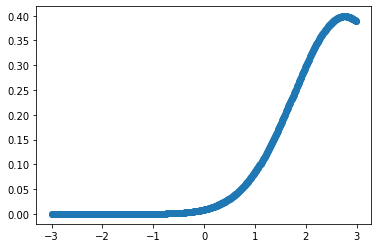

In [24]:
data = [ 2.76405235,  1.40015721,  1.97873798,  3.2408932 ,  2.86755799,
        0.02272212,  1.95008842,  0.84864279,  0.89678115,  1.4105985 ,
        1.14404357,  2.45427351,  1.76103773,  1.12167502,  1.44386323,
        1.33367433,  2.49407907,  0.79484174,  1.3130677 ,  0.14590426,
       -1.55298982,  1.6536186 ,  1.8644362 ,  0.25783498,  3.26975462,
       -0.45436567,  1.04575852,  0.81281615,  2.53277921,  2.46935877,
        1.15494743,  1.37816252,  0.11221425, -0.98079647,  0.65208785,
        1.15634897,  2.23029068,  2.20237985,  0.61267318,  0.69769725,
       -0.04855297, -0.42001794, -0.70627019,  2.9507754 ,  0.49034782,
        0.5619257 , -0.25279536,  1.77749036, -0.61389785,  0.78725972]

# 힌트 코드

import numpy as np
import matplotlib.pyplot as plt    # 그래프를 그리기 위해 필요

mle_s = np.arange(-3, 3, 0.01)    # MLE 후보들

# likelihood를 계산하는 함수
def get_likelihood(mle, data):
  from scipy import stats
  import scipy as sp
  return sp.stats.norm(loc = mle).pdf(data)[0]
    # 각 mle마다 likelihood를 계산합니다 (작성해야되는 부분)

# 추정한 평균을 통해 likelihood의 값을 구합니다
likelihood_s = []
for mle in mle_s:
    likelihood = get_likelihood(mle, data)
    likelihood_s.append(likelihood)

# 그래프를 그립니다
plt.scatter(mle_s, likelihood_s)
import pandas as pd
print(mle_s[pd.Series(likelihood_s).idxmax()])
plt.show()

MLE에 대해 여기에 답하시면 됩니다. (더블클릭하세요)
MLE : 2.759999999999877


# 문제2. 하이퍼파라미터 (Hyperparameter)
- 난이도 : 하 
- 관련 개념 : 하이퍼파라미터 조절을 통해 오버피팅, 언더피팅의 개념을 확인
- 설명이 부족한 경우 (10점), 틀린 내용이 들어간 경우 (0점)

다음은 서포터벡터머신(SVM)에서 특정 하이퍼파라미터를 조절한 결과들이다. 하이퍼파라미터와 모델 오버피팅(또는 언더피팅)의 관계에 대해 논하여라.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_features=5, n_redundant=0, n_informative=4,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.1, 1.0, 10.0, 100.0, 1000.0]
for c in C:
    # 모델 훈련
    svc = SVC(c)
    svc.fit(X_train, y_train)
    # 예측
    train_pred = svc.predict(X_train)
    test_pred = svc.predict(X_test)
    # 정확도
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print(f'하이퍼파라미터 = {c}')
    print(f'훈련 데이터셋 정확도 = {train_acc:.3f}')
    print(f'테스트 데이터셋 정확도 = {test_acc:.3f}')
    print(f'정확도의 차이 (훈련-테스트) = {(train_acc-test_acc):.3f}')
    print('------------------------------------')

하이퍼파라미터 = 0.1
훈련 데이터셋 정확도 = 0.929
테스트 데이터셋 정확도 = 0.950
정확도의 차이 (훈련-테스트) = -0.021
------------------------------------
하이퍼파라미터 = 1.0
훈련 데이터셋 정확도 = 0.943
테스트 데이터셋 정확도 = 0.950
정확도의 차이 (훈련-테스트) = -0.007
------------------------------------
하이퍼파라미터 = 10.0
훈련 데이터셋 정확도 = 0.951
테스트 데이터셋 정확도 = 0.955
정확도의 차이 (훈련-테스트) = -0.004
------------------------------------
하이퍼파라미터 = 100.0
훈련 데이터셋 정확도 = 0.966
테스트 데이터셋 정확도 = 0.950
정확도의 차이 (훈련-테스트) = 0.016
------------------------------------
하이퍼파라미터 = 1000.0
훈련 데이터셋 정확도 = 0.983
테스트 데이터셋 정확도 = 0.915
정확도의 차이 (훈련-테스트) = 0.068
------------------------------------


여기에 정답을 써주시면 됩니다. (더블클릭하세요) </br>
하이퍼파라미터는 개발자가 지정하는 파라미터로, SVC에서는 높은 값을 주면 주어진 자료에 더 많이 적합하게 된다. 이때, 하이퍼 파라미터 10 을 기준으로 테스트 데이터셋에 대한 정확도가 떨어지고 있으므로, 훈련 데이터셋에 대한 과적합이 일어나고 있음을 알 수 있다.


# 문제3. PCA
- 난이도 : 중 
- 관련 개념 :주성분 분석 (PCA)
- 코드와 간략한 설명으로 답해주세요.

다음은 주어진 데이터 $X$에 PCA를 적용하여 $Z(z=x^TW)$를 구한 결과이다. 각 $z$들이 서로 독립임을 보여라.

- 힌트
    - 두 벡터가 서로 (선형)독립임을 보이는 경우 내적을 하여 0이 됨을 보이면 됩니다. (단, python에서 계산하면 완전히 0은 아니여도 거의 0에 가까운 수가 나옴)
    - $Z$에서 행, 열에 유의해서 풀어주세요.


In [4]:
import numpy as np
from sklearn.decomposition import PCA

# 데이터
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# PCA
pca = PCA(n_components=2)
pca.fit(X)

# Z
Z = pca.transform(X)

# 각 z들은 Z의 컬럼에 해당합니다
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [8]:
# 여기에 풀어주시면 됩니다
# 코드와 간단하게 주석을 달아주시면 됩나다

Z[:,0].T @ Z[:,1]  # 9.159339953157541e-16
# 두 벡터의 내적이 (거의) 0 이므로 각 z들은 서로 독립임




9.159339953157541e-16


# 문제4. k-means
- 난이도 : 하 
- 관련 개념 : k-means에서 군집의 갯수 선택방법 알아보기
- 몇 개인지 답을 하고 간략하게 이유를 적어주세요.
    - 사람마다 생각이 다를 수 있는 답안이므로 이를 감안하여 채점합니다.
    - 단, "elbow method"를 고려한 답안이여야 합니다. 이를 고려하지 않고 이유를 적은 경우 (10점), 틀린 내용을 이야기한 경우 (0점)

k-means clustering 알고리즘은 사용자가 군집(cluster)가 몇개인지 직접 정해줘야 한다.이를 정하는 방법 중 하나로 "elbow method"가 있다. 아래 사진을 통해 군집을 몇 개 선택해야하는지 답하여라.

- 힌트
    - 아래 사진에서 y축은 각 "데이터와 해당 데이터가 속한 군집의 평균(중심)"간의 거리들의 합으로 이해하시면 됩니다. 잘모르시겠다면 구글에서 해당 내용을 찾아보시면 좋은 공부가 될 것 같습니다 :)
    - "elbow method"에 대해 잘 모르신다면 구글링을 통해 이해하는 시간을 가지면 좋을 것 같습니다 :)


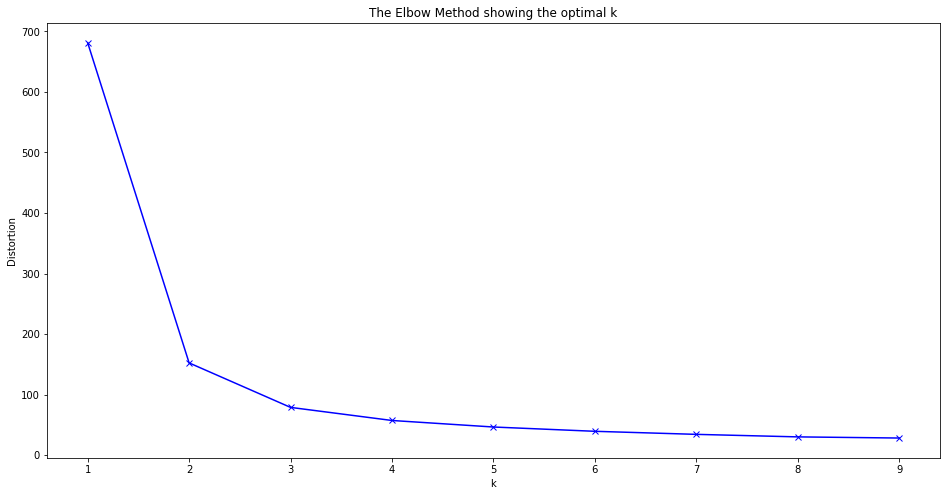

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
df=pd.DataFrame(iris['data'])

distortions = []
K = range(1,10) # 군집은 1부터 10까지
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

여기에 정답을 써주시면 됩니다. (더블클릭하세요)</br>
급격한 경사가 이루어지는 2값이 elbow point로 이 값에서 하이퍼 파라미터를 선택하면 된다. 설명력을 더 올리고 싶다면 3을 선택해도 좋다.


# 문제5. 추정량 (Estimator)
- 난이도 : 상
- 관련 개념 : 추정량(estimator)의 편향(bias)
- 풀이과정없이 답만 작성하면 됩니다. (풀이과정을 적으실 수 있다면 적으셔도 좋습니다)


심층이는 가우스분포(Gaussian distribution)의 분산($\sigma^2$)을 추정하고자 한다. $m$개의 iid 데이터를 이용하여 심층이가 생각한 추정량(estimator)는 다음과 같다.

$$\hat{\sigma}^2=\frac{1}{m-1}\sum_{i=1}^{m}(x_i - \bar{x})^2$$

이 추정량의 편향(bias)을 구하여라.



 여기에 정답을 써주시면 됩니다. (더블클릭하세요)</br>
0

---

